**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>



<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center>
<center>слушателя Кузнецова Ромна Дмитриевича<br>группы № 287 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Python для анализа данных» </center>
<br>
<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> Москва, 2024

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вина, составляемого специализированным журналом Wine Enthusiast. Для анализа используется набор данных из Kaggle (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Столбцы данных
- Страна - страна происхождения вина.<br>
- Описание — описание вкусового профиля вина.<br>
- Обозначение - виноградник-поставщик винограда для изготовления вина.<br>
- Рейтинг - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- Цена - цена одной бутылки вина.<br>
- Провинция — регион (провинция, штат) производства вина.<br>
- Регион 1 — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- Регион 2 — (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- Разновидность — сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- Винодельня — производитель вина.<br>

#  <a name="1">1.Предобработка данных</a>

Подготовка данных к анализу (очистка данных, трансформация данных, дополнение, оптимизация):
* Заменить названия столбцов (привести к нижнему регистру).<br>
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.<br>
* Обработать пропуски при необходимости. <br>


Импорт необходимых библиотек

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузка данных

In [412]:
df= pd.read_csv('wine_reviews.xls')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. Признак points и price числовые. С помощью библиотеки Seaborn построим тепловую карту для визуализации данных.

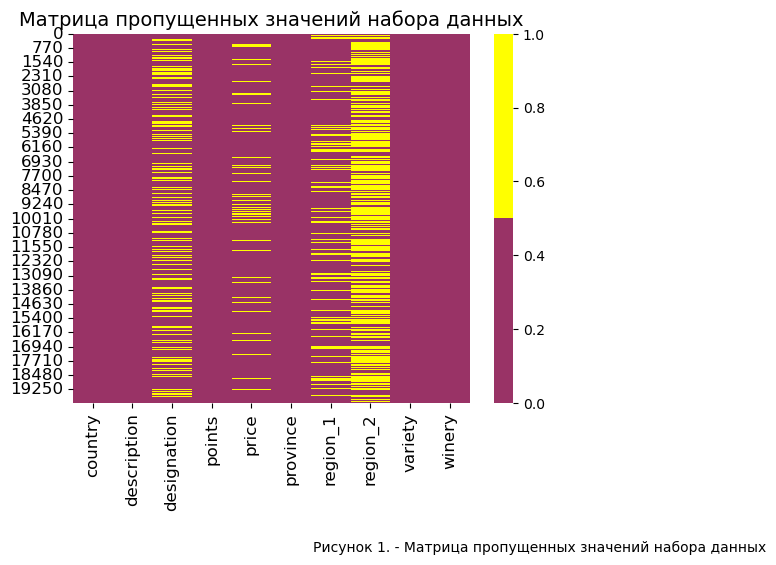

In [105]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
plt.show()

Проверим количество пропущенных значений и процент от общего числа данных.

In [108]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
region_2,11942,59.710
designation,6001,30.005
region_1,3457,17.285
price,1802,9.010
country,0,0.000
description,0,0.000
points,0,0.000
province,0,0.000
variety,0,0.000
winery,0,0.000


Поле region_2 имеет больше всего пропусков, более 50%, это не обязательная информация поэтому этот столбец удаляем.

In [11]:
df = df.drop(columns = ["region_2"])

Удалим пустые строки с ценами.

In [13]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Количество рпопущеных значений: {}".format(missing_prices)+ "\n" +
      "Всего записей: {}".format(total_records) + "\n" +
      "Процентное соотношение после удаления столбцов: {:.2f}%".format(missing_ratio))

Количество рпопущеных значений: 1802
Всего записей: 20000
Процентное соотношение после удаления столбцов: 90.99%


Если мы удалим все записи с отсутствующими ценами, мы останемся с 90,99% набора данных. Мы можем смело отбрасывать записи с отсутствующими значениями и не влиять на результаты кардинально.

In [15]:
df = df.dropna(axis='index', how='any', subset=['price'])
print(df.count())

country        18198
description    18198
designation    12637
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


In [17]:
print(df.isnull().sum())

country           0
description       0
designation    5561
points            0
price             0
province          0
region_1       3165
variety           0
winery            0
dtype: int64


Поля designation и region_1 не трогаем.

Добавляем цвет вина.

In [19]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
}
df['color']= df['variety'].map(color)
df = df.dropna(axis='index', how='any', subset=['color'])
print(df.count())

country        15041
description    15041
designation    10526
points         15041
price          15041
province       15041
region_1       12365
variety        15041
winery         15041
color          15041
dtype: int64


Удалим дупликаты.

In [21]:
df=df.drop_duplicates(keep=False)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red


Мы провели подготовку данных:
* убрали ненужные поля
* убрали дубликаты 
* добавили цвет вина
* убрали пустые строки


#  <a name="2"> 2. Исследовательский анализ данных</a>
* Найти среднюю цену вина для каждой страны.
* Выбрать сорта с наибольшими ценами.
* Определить, какие сорта вина лидируют по рейтингам.
* Определить, популярные сорта вина в бюджетном сегменте.
* Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина.
* Выявить закономерность влияния на цену  цвета и рейтинга вина.
* Построить диаграмму рассеяния и посчитать корреляцию.


### Страны
Сперва определимся по имеющимся странами и количтеством вина.

In [282]:
df["country"].describe()

count     13388
unique       32
top          US
freq       6628
Name: country, dtype: object

У нас имеется 32 уникальные страны производители вина и лидирует по количеству Соединенный Штаты (US).
Сделаем гистограмму, чтобы определить самые популярные страны.

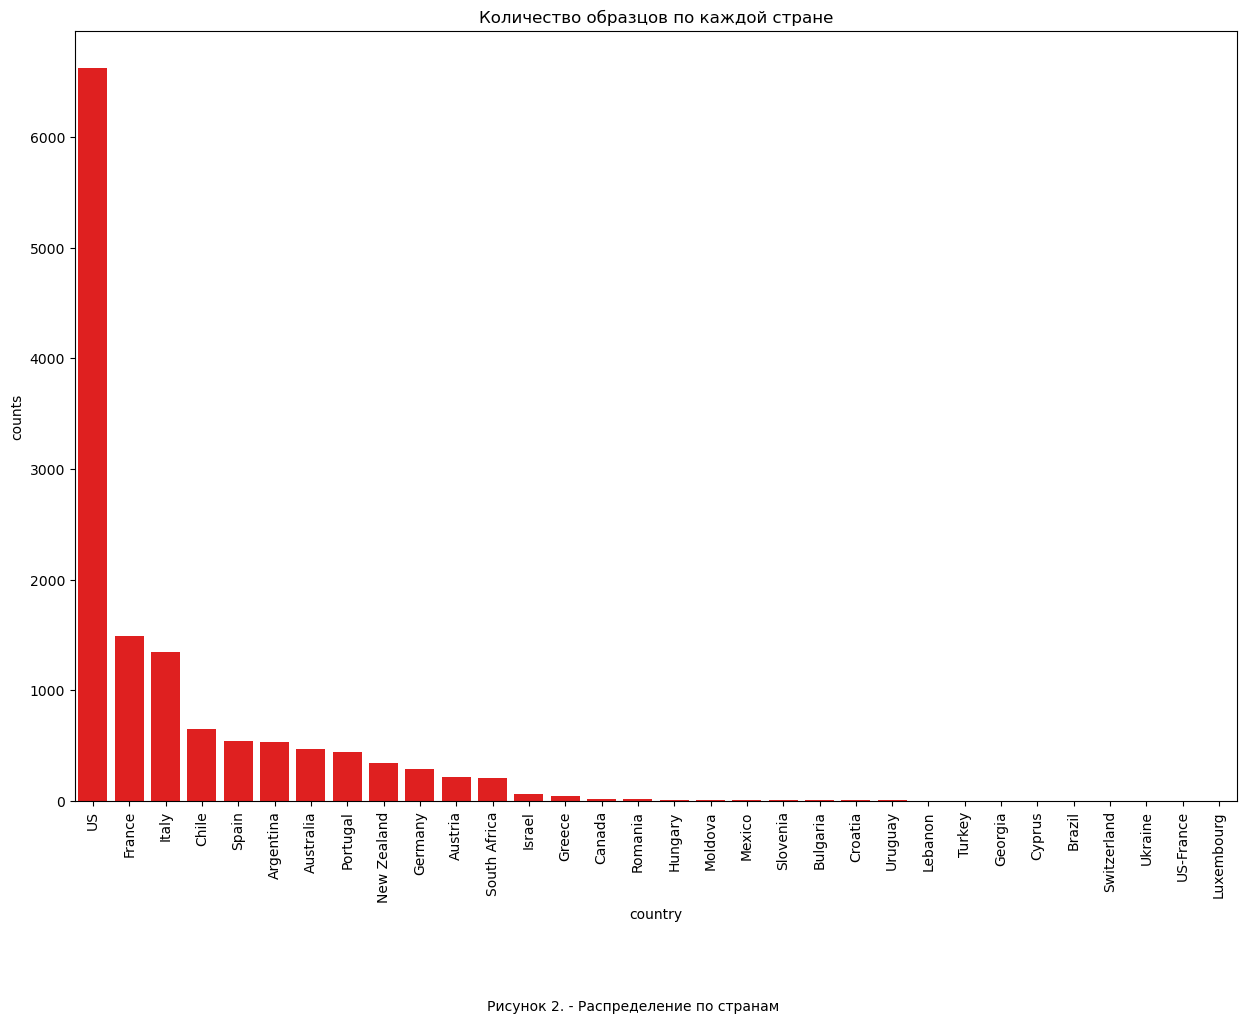

In [140]:
df_country = df['country'].value_counts().to_frame()
df_country.reset_index(inplace=True)
df_country.columns = ['country','counts']
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(data = df_country, x='country',y='counts',ax=ax, color= 'red').set_title('Количество образцов по каждой стране');
plt.figtext(0.4, -0.1, "Рисунок 2. - Распределение по странам ")
plt.xticks(rotation='vertical');

Самой распространенной страной является США, далее идет Франция, Италия, Чили. Такая тенденция может быть объяснена тем, что набор данных был подготовлоен журналом из США.

### Цены
Найдем среднюю цену вина для каждой страны.

In [280]:
mean_price = round(df['price'].groupby(df['country']).mean(), 2)
mean_price

country
Argentina       23.59
Australia       31.62
Austria         34.42
Brazil          19.50
Bulgaria        11.43
Canada          39.59
Chile           19.70
Croatia         21.17
Cyprus          14.00
France          50.45
Georgia         11.50
Germany         36.83
Greece          23.04
Hungary         27.00
Israel          30.38
Italy           42.80
Lebanon         33.33
Luxembourg      36.00
Mexico          26.89
Moldova         14.90
New Zealand     24.57
Portugal        29.36
Romania         13.40
Slovenia        24.38
South Africa    22.26
Spain           30.09
Switzerland     19.00
Turkey          55.33
US              34.17
US-France       50.00
Ukraine         13.00
Uruguay         20.40
Name: price, dtype: float64

In [291]:
data_to_plot = df['price'].groupby(df['country']).mean().sort_values(ascending=False).to_frame()

Text(0.4, 0, 'Рисунок 3. - Зависимость цены от страны')

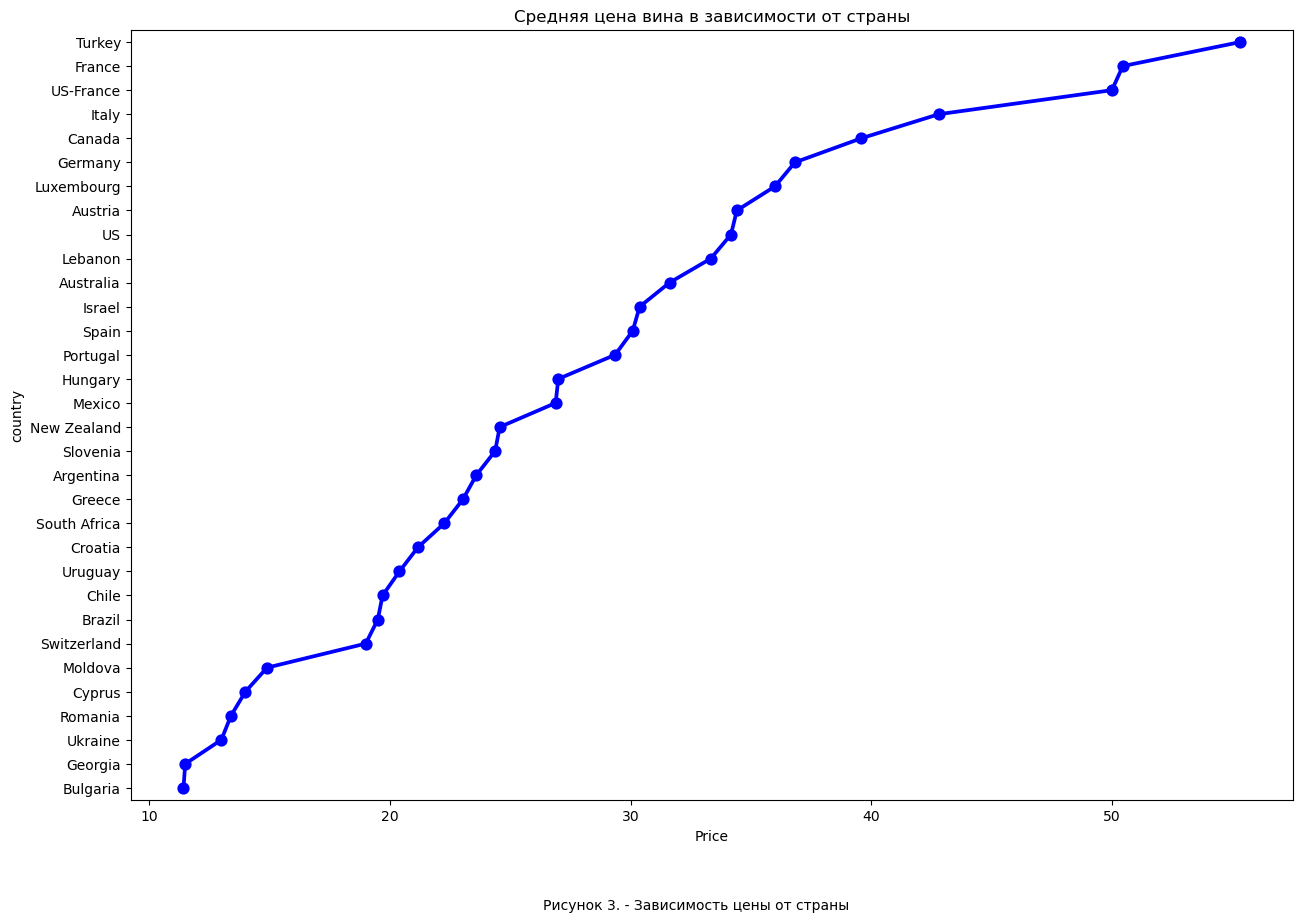

In [293]:
plt.figure(figsize=(15,10))
sns.pointplot(x = data_to_plot.price ,y = data_to_plot.index, color='blue', orient='h')
plt.title('Средняя цена вина в зависимости от страны')
plt.xlabel('Price');
plt.figtext(0.4, 0 , "Рисунок 3. - Зависимость цены от страны" )

Из графика можно сделать вывод что самые дорогие виды вина встречаются в Турции, Франции, Италии,Канады и Германии. Однако по рисунку.2 можно сделать вывод, что нам представлено слишком мало данных о винах из Турции и Канады и данные могут быть некоректны.

Определим самые дорогие сорта вина.

In [206]:
data_to_price = df['price'].groupby(df['variety']).mean().sort_values(ascending=False).to_frame()
data_to_price= data_to_price.head(10)

Text(0.4, 0, 'Рисунок 4. - Самые дорогие сорты вина')

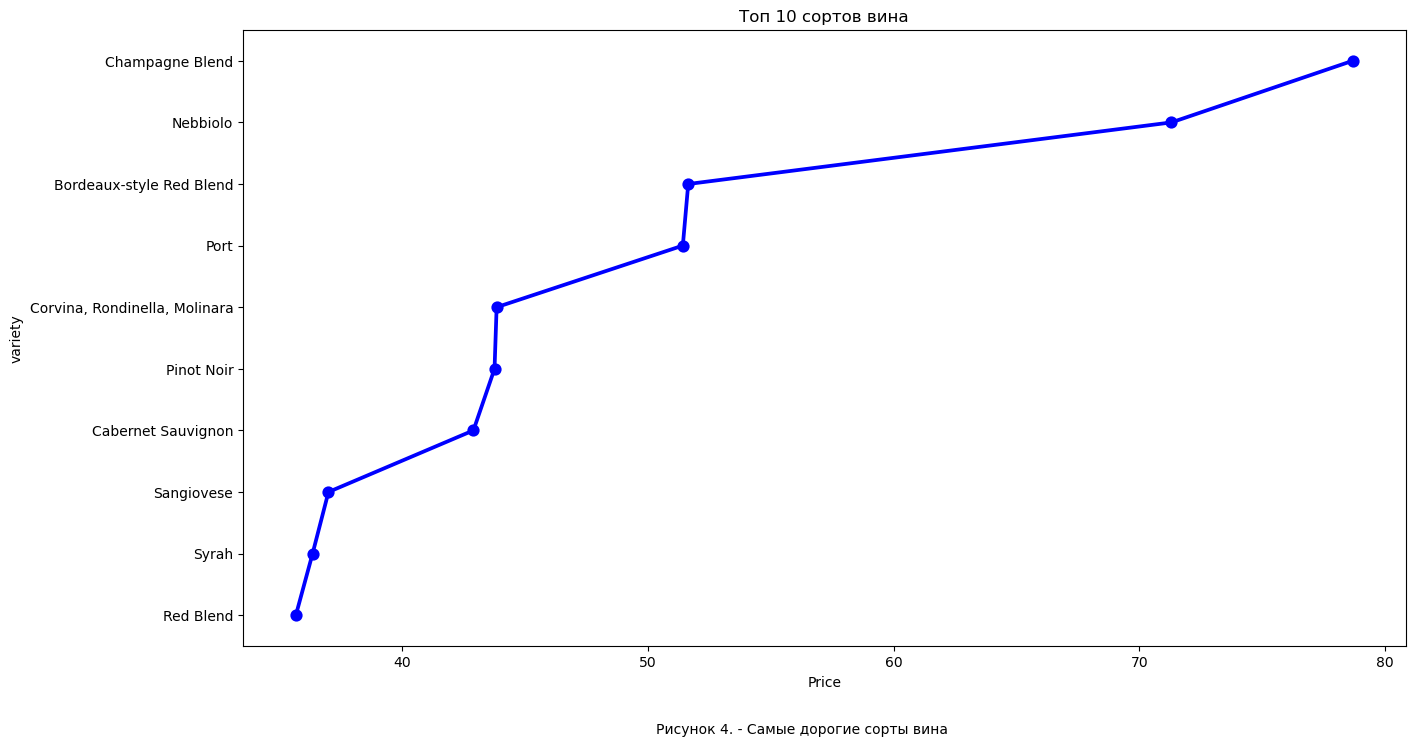

In [287]:
plt.figure(figsize=(15,8))
sns.pointplot(x = data_to_price.price ,y = data_to_price.index, color='blue', orient='h')
plt.title('Топ 10 сортов вина')
plt.xlabel('Price');
plt.figtext(0.4, 0 , "Рисунок 4. - Самые дорогие сорты вина" )

Наибольшую среднюю цену имеют вина сортов Champagne, Nebbiolo и Bordeaux.

### Рейтинг вина
Определим какие сорта вина лидируют по рейтингам. Построим график ящик с усами с рейтинг в зависмоти от сорта вина.

Text(0.4, 0, 'Рисунок 5. -  Самые рейтинговые сорта вина')

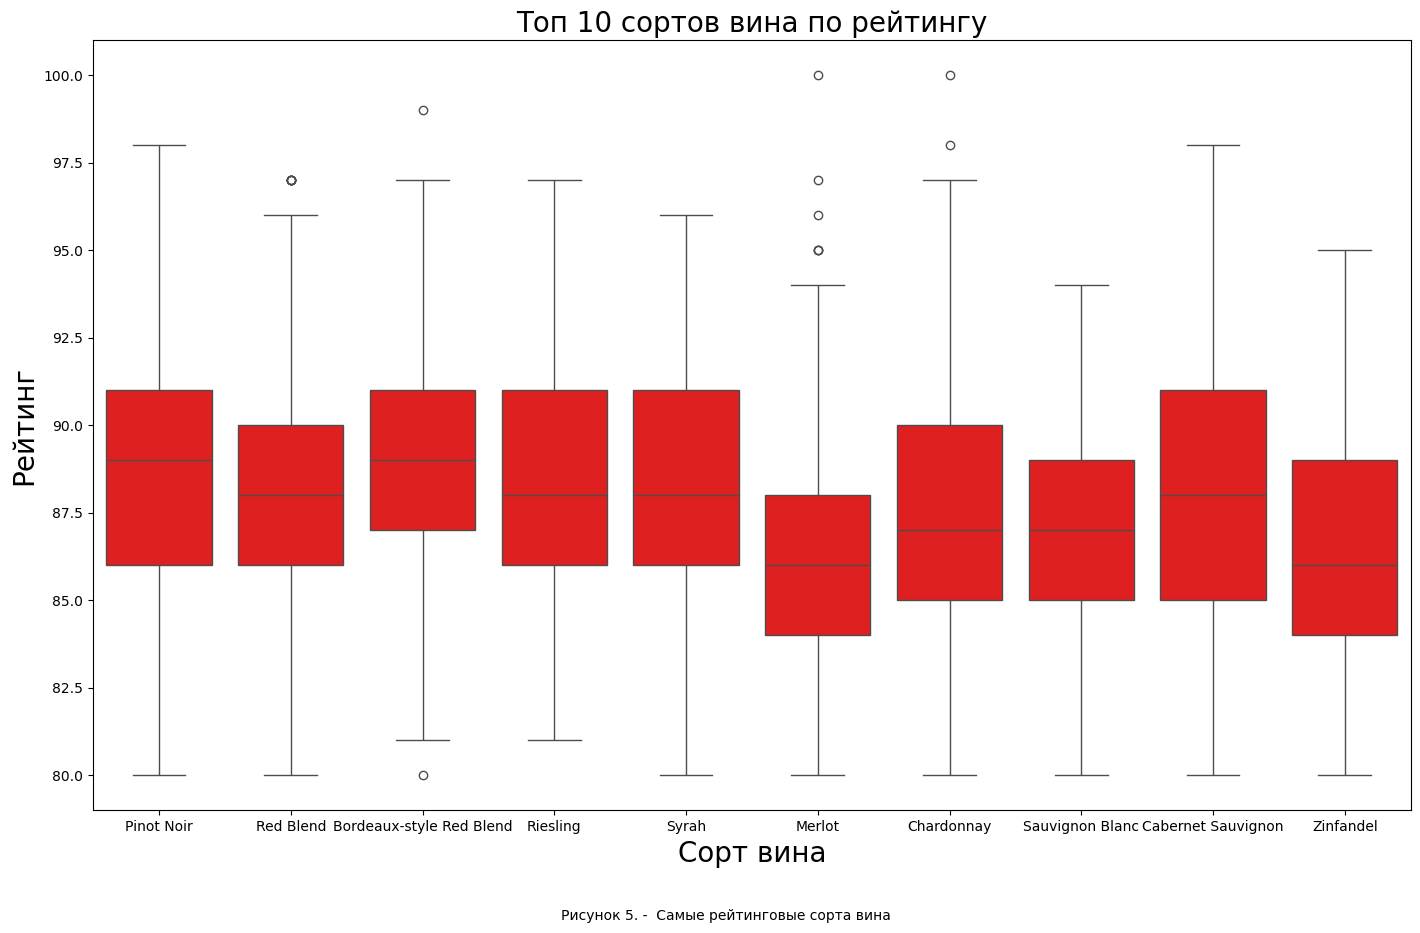

In [303]:
fig = plt.figure(figsize=(17,10))
top_reviewed_wines = df.variety.value_counts().head(10)
points_top_reviewed_wines = df[df.variety.isin(top_reviewed_wines.index)]


sns.boxplot(x = points_top_reviewed_wines.variety,y = points_top_reviewed_wines.points, color= 'red')
plt.xlabel('Сорт вина', fontsize=20)
plt.ylabel('Рейтинг', fontsize=20)
plt.title('Топ 10 сортов вина по рейтингу',fontsize=20)
plt.figtext(0.4, 0, "Рисунок 5. -  Самые рейтинговые сорта вина" )

Самые всокие рейтинги у Pinot Noir и Boedeaux.

Определим лучшие сорта винограда в бюджетном сегменте.
Сначала сформируем бюджетный сегмент, определим среднюю цену всего вина и то, что будет ниже определим в бюджетный сегмент. 

In [227]:
print('Средняя цена вина =', round(df['price'].mean(),2))

Средняя цена вина = 34.8


In [229]:
def PriceType(row):
    if row['price'] >= 34.8:
        val = 'expeisive'
    else:
        val = 'cheap'
    return(val)
df['price_type'] = df.apply(PriceType, axis=1)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,color,price_type
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,cheap
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,expeisive
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,expeisive
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,cheap
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,cheap


Теперь найдем лучшие сорта вина в бюджетном сегменте.

In [263]:
cheap= df[df['price_type']=='cheap']
cheap_wine= cheap['points'].groupby(cheap['variety']).mean().sort_values(ascending=False).to_frame().head(10)

Text(0.4, 0, 'Рисунок 6. - Топ 10 бюджетных сортов вина')

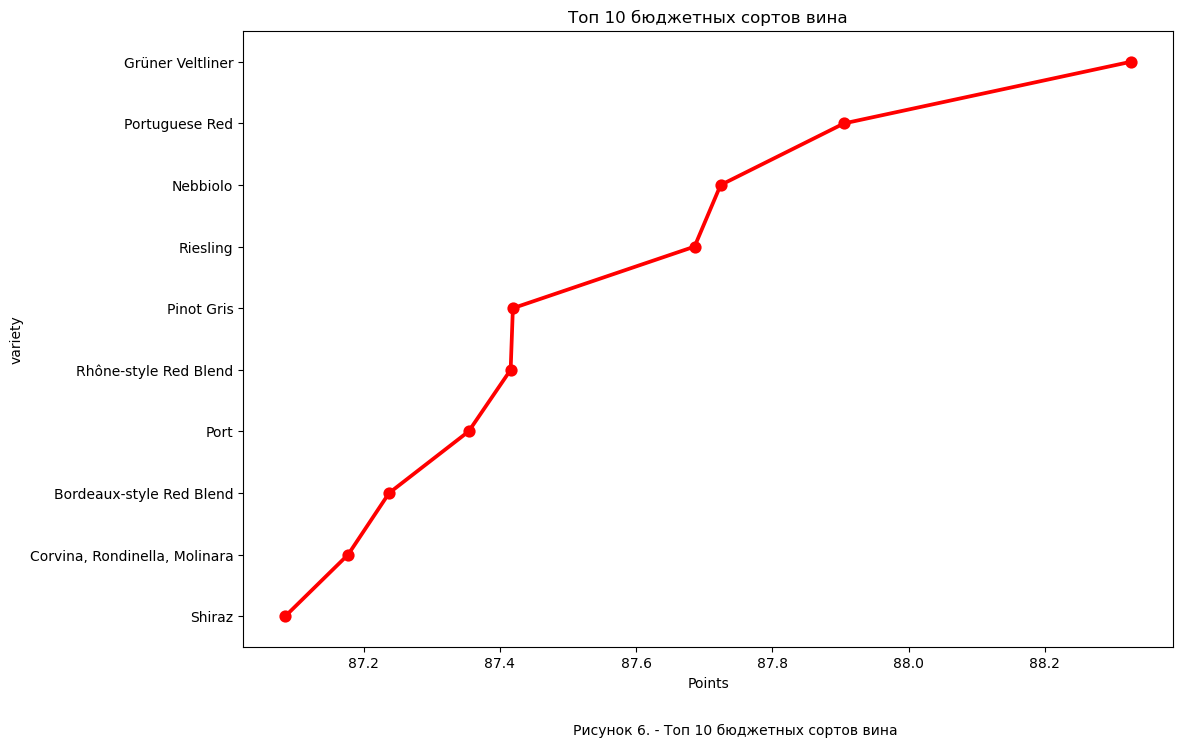

In [271]:
plt.figure(figsize=(12,8))
sns.pointplot(x = cheap_wine.points ,y = cheap_wine.index, color='red', orient='h')
plt.title('Топ 10 бюджетных сортов вина')
plt.xlabel('Points');
plt.figtext(0.4, 0 , "Рисунок 6. - Топ 10 бюджетных сортов вина" )

Самым высоко оцениваемым вином среди бюджетных оказались Gruner, Portugeze Red и Nebbiolo.

Построим график «ящик с усами» по рейтингам в разбивке по странам.

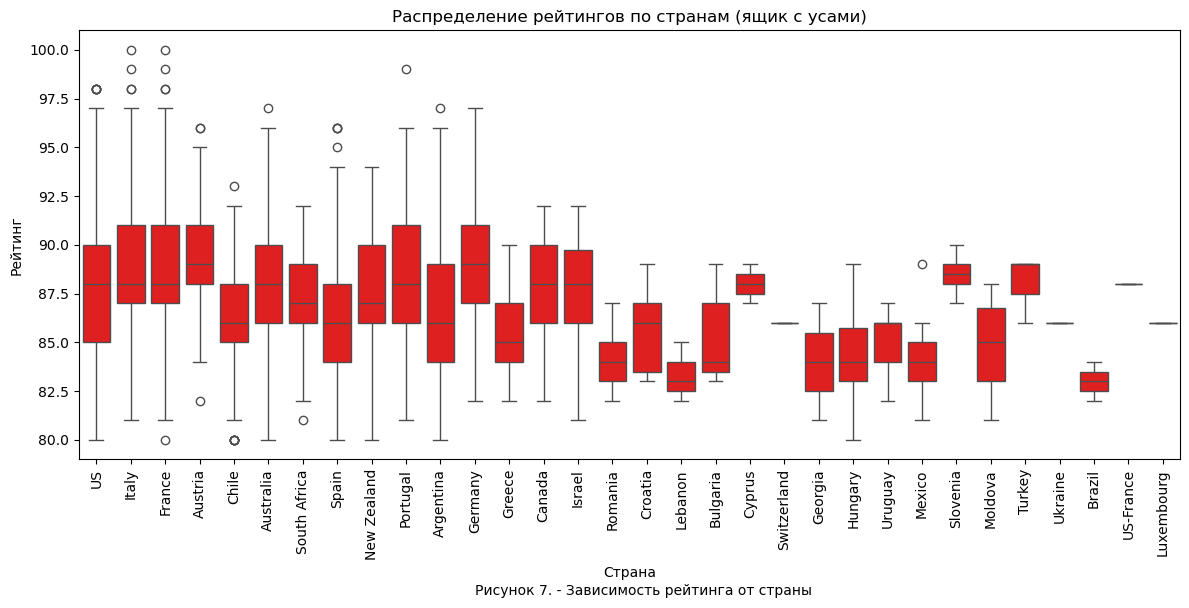

In [299]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="country", y="points", color='red')
plt.title("Распределение рейтингов по странам (ящик с усами)")
plt.xticks(rotation=90)
plt.xlabel("Страна")
plt.ylabel("Рейтинг")
plt.figtext(0.4, 0 , "Рисунок 7. - Зависимость рейтинга от страны" )
plt.tight_layout()
plt.show()

Распределение рейтингов по странам, представленное на графике «ящик с усами», позволяет выделить несколько ключевых тенденций. Страны, такие как Франция, Италия и США, характеризуются высокими медианными значениями рейтингов, а также значительным числом вин с оценками выше 90. Это подтверждает их репутацию производителей высококачественного вина

### Зависимоть цены и рейтинга от цвета вина
Выявить закономерность влияния на цену цвета и рейтинга вина.

Text(0.4, -0.1, 'Рисунок 8. - Популярность вина по цветам')

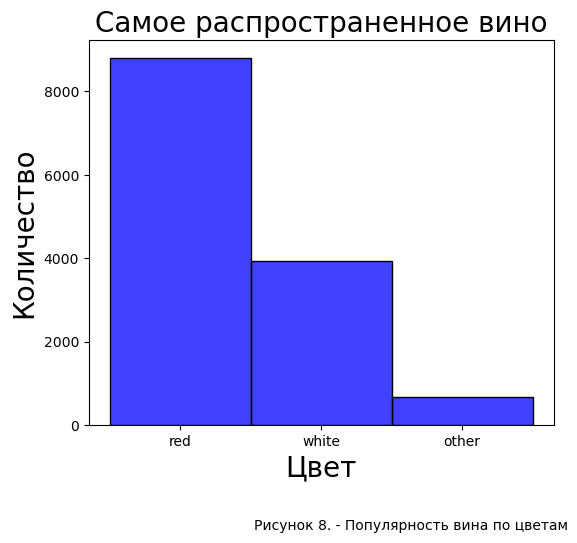

In [311]:

fig = plt.figure(figsize=(6,5))
sns.histplot(df.color, color='blue')
plt.xlabel('Цвет', fontsize=20)
plt.ylabel('Количество', fontsize=20)
plt.title('Самое распространенное вино',fontsize=20)
plt.figtext(0.4, -0.1, "Рисунок 8. - Популярность вина по цветам" )

Самое популярное вино красное.

In [89]:
color= df.groupby('color').agg({'points': ['mean','median'], 'price':['mean','median']})
color

points             price       
            mean median       mean median
color                                    
other  87.323838   87.0  30.901049   19.0
red    88.046395   88.0  38.418922   30.0
white  87.632799   87.0  27.372549   20.0

Рейтинг вина не завист от цвета.
Средняя стоимость красного вина, больше чем у белого.

Text(0.4, 0, 'Рисунок 9. - График зависимости рейтинга от цены')

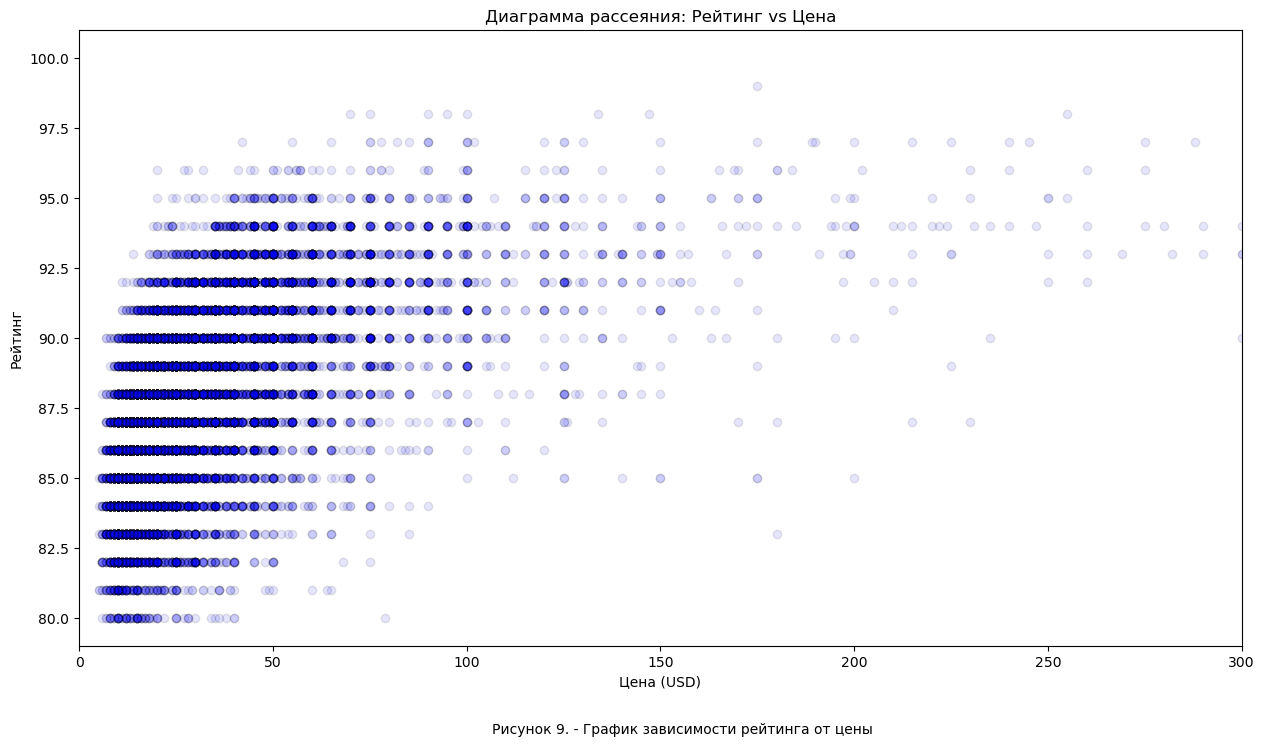

In [213]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(df["price"], df["points"], facecolors="blue", edgecolors="black", alpha=.1)
plt.xlim(0, 300)
plt.title("Диаграмма рассеяния: Рейтинг vs Цена")
plt.xlabel("Цена (USD)")
plt.ylabel("Рейтинг")
plt.figtext(0.4, -0, "Рисунок 9. - График зависимости рейтинга от цены" )

Диаграмма рассеяния, отображающая соотношение рейтинга и цены вина, показывает умеренную положительную зависимость между этими показателями. С ростом рейтинга вина, особенно выше отметки 90, увеличивается доля более дорогих образцов, что свидетельствует о взаимосвязи между качеством и стоимостью продукции.

#  <a name="3">3. Составление структуры развития рынка вина регионов</a>

* Самые популярные сорта (топ-5).
* Влияет ли рейтинг на цены по регионам?

Топ-5 самых популярных сортов вина и их доли продаж (%):
variety
Pinot Noir            12.399163
Chardonnay            11.861368
Cabernet Sauvignon    10.920227
Red Blend              8.096803
Sauvignon Blanc        5.445175
Name: count, dtype: float64


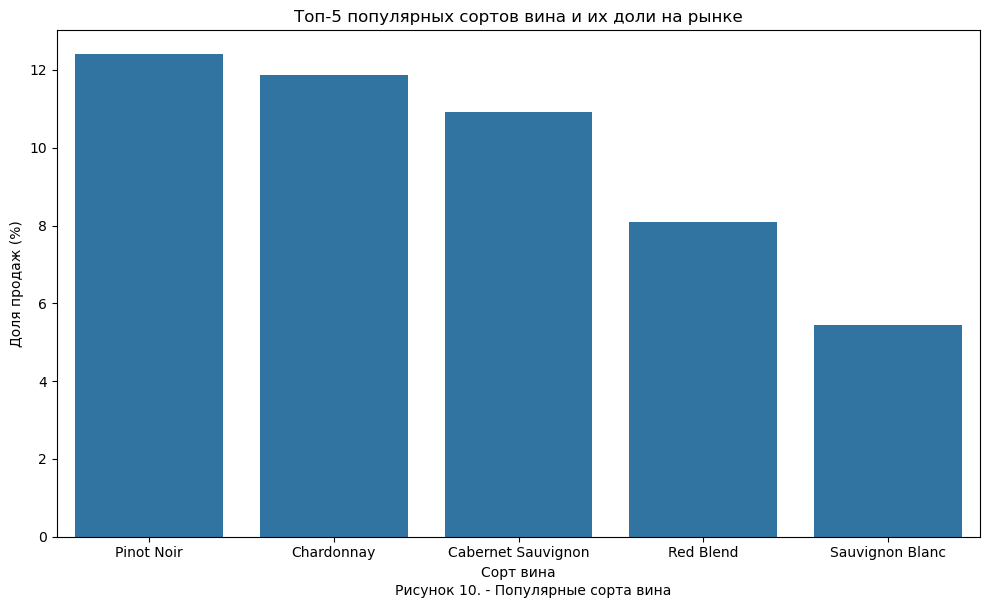

In [229]:
top_varieties = df["variety"].value_counts().head(5)
top_varieties_percentage = (top_varieties / len(df)) * 100

print("Топ-5 самых популярных сортов вина и их доли продаж (%):")
print(top_varieties_percentage)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_varieties_percentage.index, y=top_varieties_percentage.values)
plt.title("Топ-5 популярных сортов вина и их доли на рынке")
plt.xlabel("Сорт вина")
plt.ylabel("Доля продаж (%)")
plt.figtext(0.4, -0, "Рисунок 10. - Популярные сорта вина" )
plt.tight_layout()
plt.show()


Выводы по топ-5 популярных сортов вина: Pinot Noir и Chardonnay занимают лидирующие позиции с долей около 12.3% и 11.8% соответственно. Cabernet Sauvignon также занимает значительную долю на рынке — 10.9%. Red Blend и Bordeaux-style Red Blend имеют меньшую, но значительную долю — 8% и 5.4%.

Влияет ли рейтинг на цены по регионам?

In [340]:
country= df.groupby('region_1').agg({'points': ['mean','median', 'var','std','sem'],'price':['median']})

country['Counts'] =df['region_1'].value_counts()

country_500 = country[country['Counts']>150]
country_500

points                                        price  \
                           mean median        var       std       sem median   
region_1                                                                       
California            84.622951   84.0   6.482102  2.545997  0.133081   12.0   
Carneros              88.248521   88.0   8.390251  2.896593  0.222815   32.0   
Columbia Valley (WA)  88.563218   88.0   7.490238  2.736830  0.119788   22.0   
Mendoza               86.187879   86.0  10.833895  3.291488  0.181190   15.0   
Napa Valley           88.516418   88.0  12.438445  3.526818  0.136253   38.0   
Paso Robles           86.080268   86.0  10.731791  3.275941  0.189453   26.0   
Rioja                 87.298137   87.0  11.710559  3.422069  0.269697   22.0   
Russian River Valley  88.798561   88.0  12.944902  3.597902  0.176190   35.0   
Sonoma Coast          89.863095   90.0  12.573959  3.545978  0.273578   45.0   
Sonoma County         86.611111   86.0   8.827693  2.971143  0.211150   20.0   
Toscana               89.573171   90.0  11.117313  3.334263  0.260362   40.0   
Willamette Valley     88.670833   89.0   7.502075  2.738992  0.176801   32.0   

                     Counts  
                             
region_1                     
California              366  
Carneros                169  
Columbia Valley (WA)    522  
Mendoza                 330  
Napa Valley             670  
Paso Robles             299  
Rioja                   161  
Russian River Valley    417  
Sonoma Coast            168  
Sonoma County           198  
Toscana                 164  
Willamette Valley       240

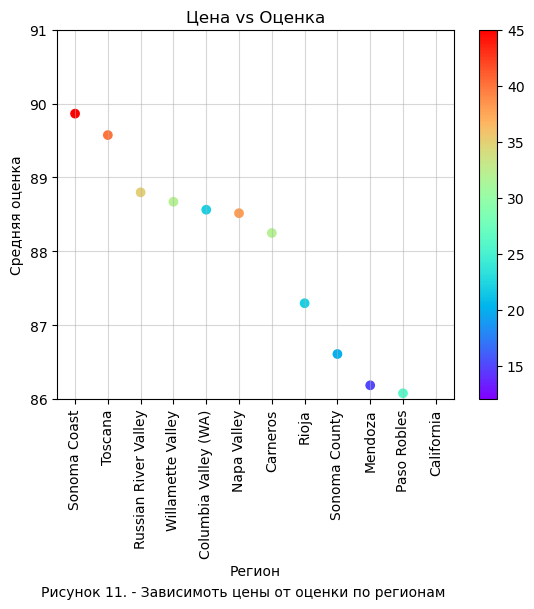

In [358]:
country_plot = pd.DataFrame(country_500).reset_index()
country_plot = country_plot.sort_values(('points','mean'), ascending=False)

plt.xticks(rotation = 90)
plt.xlabel("Регион")
plt.ylabel("Средняя оценка")
plt.title("Цена vs Оценка")
plt.ylim(86,91)
plt.grid(alpha = 0.5)
plt.figtext(0.1, -0.3, "Рисунок 11. - Зависимоть цены от оценки по регионам" )
plt.scatter(country_plot['region_1'],country_plot[('points','mean')], c=country_plot['price','median'], cmap= cm.rainbow)
plt.colorbar(cmap=cm.rainbow, orientation='vertical', label = "")
plt.show()

По диаграмме можно сделать вывод, что имеется корреляция между регионом, оценкой и ценой вина.

#  <a name="4"> 4. Исследование статистических показателей зависимости цены вина от рейтинга.</a>

Построить линейную регрессию зависимости между ценой продукта и его рейтингом.

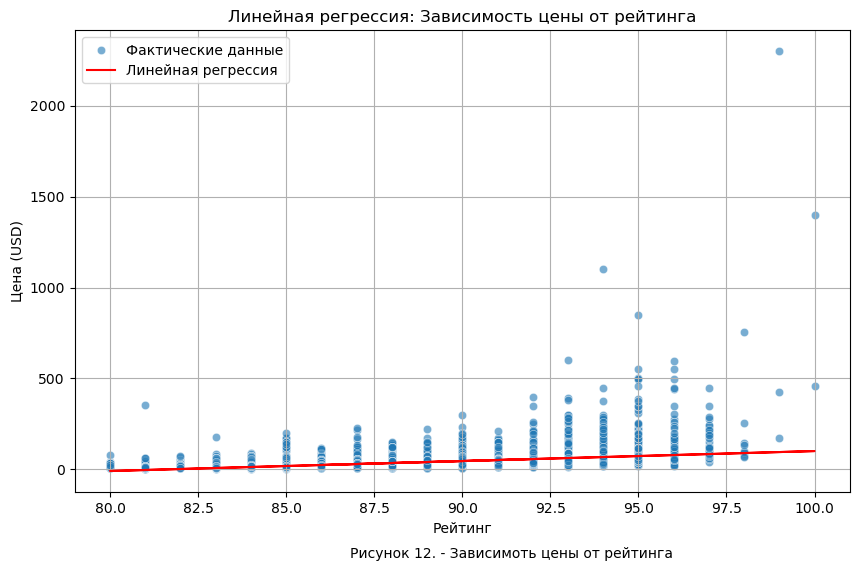

Коэффициент наклона (slope): 5.48
Свободный член (intercept): -446.70
R² (коэффициент детерминации): 0.1755
RMSE (среднеквадратическая ошибка): 39.03


In [373]:
data_reg = df[["price", "points"]].dropna()

X = data_reg[["points"]]  
y = data_reg["price"]     


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X["points"], y=y, label="Фактические данные", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Линейная регрессия")
plt.title("Линейная регрессия: Зависимость цены от рейтинга")
plt.figtext(0.4, -0, "Рисунок 12. - Зависимоть цены от рейтинга") 
plt.xlabel("Рейтинг")
plt.ylabel("Цена (USD)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Коэффициент наклона (slope): {model.coef_[0]:.2f}")
print(f"Свободный член (intercept): {model.intercept_:.2f}")
print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"RMSE (среднеквадратическая ошибка): {rmse:.2f}")

Анализ линейной регрессии зависимости цены от рейтинга показал следующие ключевые результаты.

Уравнение регрессии:
Цена=5.48⋅Рейтинг−446.70
Коэффициент наклона (5.48) свидетельствует о том, что с увеличением рейтинга вина на одну единицу его цена возрастает в среднем на 5.48 USD. Этот показатель подтверждает существование положительной связи между рейтингом и ценой.
Качество модели:
Коэффициент детерминации (𝑅2=0.1755) указывает на то, что модель объясняет лишь 17.5% вариации цены. Это говорит о слабом соответствии данных линейной модели.
Среднеквадратичная ошибка (RMSE=39.03) показывает, что предсказанная цена в среднем отклоняется от реальной на 39.03 USD, что также свидетельствует о значительном разбросе данных.
Интерпретация:
Несмотря на положительное влияние рейтинга на цену, низкий 𝑅2 и высокая ошибка предсказания указывают на наличие других важных факторов, влияющих на стоимость вина. Среди них могут быть такие переменные, как регион происхождения, сорт винограда, бренд, а также редкость и уникальность продукта.                 ых

#  <a name="5">5. Проверка гипотез </a>

### Проверим две гипотезы
* Гипотеза 1: Сравнение средних пользовательских рейтингов между категориями вина (например, белое и красное вино).
* Гипотеза 2: Сравнение средних пользовательских рейтингов популярных сортов вина в зависимости от региона производства.


In [259]:
from scipy.stats import ttest_ind

red_wine = df[df["variety"].str.contains("red", case=False, na=False)]["points"]
white_wine = df[df["variety"].str.contains("white", case=False, na=False)]["points"]

t_stat, p_value = ttest_ind(red_wine, white_wine, equal_var=False)

alpha = 0.05

print("Сравнение средних рейтингов красного и белого вина")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние рейтинги равны.")

Сравнение средних рейтингов красного и белого вина
t-статистика: 8.8002
p-значение: 0.0000
Отвергаем нулевую гипотезу: средние рейтинги различаются.


In [264]:
pinot_noir = df[df["variety"] == "Pinot Noir"]
regions = pinot_noir["region_1"].value_counts().head(2).index  

region_1_data = pinot_noir[pinot_noir["region_1"] == regions[0]]["points"]
region_2_data = pinot_noir[pinot_noir["region_1"] == regions[1]]["points"]

t_stat_2, p_value_2 = ttest_ind(region_1_data, region_2_data, equal_var=False)

print(f"Сравнение средних рейтингов Pinot Noir между регионами: {regions[0]} и {regions[1]}")
print(f"t-статистика: {t_stat_2:.4f}")
print(f"p-значение: {p_value_2:.4f}")
if p_value_2 < alpha:
    print("Отвергаем нулевую гипотезу: средние рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние рейтинги равны.")

Сравнение средних рейтингов Pinot Noir между регионами: Russian River Valley и Willamette Valley
t-статистика: 2.6898
p-значение: 0.0075
Отвергаем нулевую гипотезу: средние рейтинги различаются.


# <a name="6">6. Выводы</a>

* На рейтинг вина влияют категория (белое или красное), сорт, а также регион производства.
* Популярные сорта, такие как Pinot Noir и Chardonnay, остаются основой потребительского спроса и ключевыми факторами развития отрасли.
* Практическая значимость: результаты исследования могут быть использованы для оптимизации маркетинговых стратегий, определения ценовой политики и позиционирования продукции на рынке.

**<center>Список литературы</center>**


**Нормативные правовые акты:**
1.	Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

**Учебники и учебные пособия:**
1.	Андерсон. К., Аналитическая культура: от сбора данных до бизнес-результатов. - Москва : Манн, Иванов и Фербер, 2017.
2.	Нисчал Н., Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.
3.	Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2021.
4.	Пасхавер Б., Pandas в действии. — СПб.: Питер, 2023.
5.	Плас Дж. Вандер., Python для сложных задач: наука о данных — СПб.: Питер, 2024.
6.	Уилке К., Основы визуализации данных. Пособие по эффективной и убедительной подаче информации.— М.: Эксмо, 2024.

**Электронные ресурсы:**
1.	PEP 8 – руководство по стилю для кода Python [Электронный ресурс]: URL: https://peps.python.org/pep-0008/ ((дата обращения: 16.12.2024).
2.	Сайт Python Academy [Электронный ресурс]: URL: https://www.python-academy.com/ (дата обращения: 16.012.2024).

